# Homework 2

## Lihua Pei

### Due by 11:59pm on 1 November ( submit within Portfolio )

For each instruction, show your code and execution within the Jupyter Notebook.

In [ ]:

#Instruction1: import library and settings



In [150]:
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

from cycler import cycler

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (16, 12)
rcParams['figure.dpi'] = 150
rcParams['axes.prop_cycle'] = cycler(color = dark2_colors)
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

#Instruction2: Describe your data set (see hint below):

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


In [7]:
#Instruction3: Import your dataset and print then number of rows and columns
import pandas as pd
df=pd.read_csv("wdbc.csv")
print(df.shape)



(569, 12)


In [17]:
#Instruction4: Print the names of the features/attributes of your dataset and show the head of the dataset
print(df.iloc[0,:])
df.head()

ID_Number              842302
Diagnosis                   M
Radius                  17.99
Texture                 10.38
Perimeter               122.8
Area                     1001
Smoothness             0.1184
Compactness            0.2776
Concavity              0.3001
Comcave_Points         0.1471
Symetry                0.2419
Fractal_dimensions    0.07871
Name: 0, dtype: object


,ID_Number,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Comcave_Points,Symetry,Fractal_dimensions
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2329ee10>,
      dtype=object)

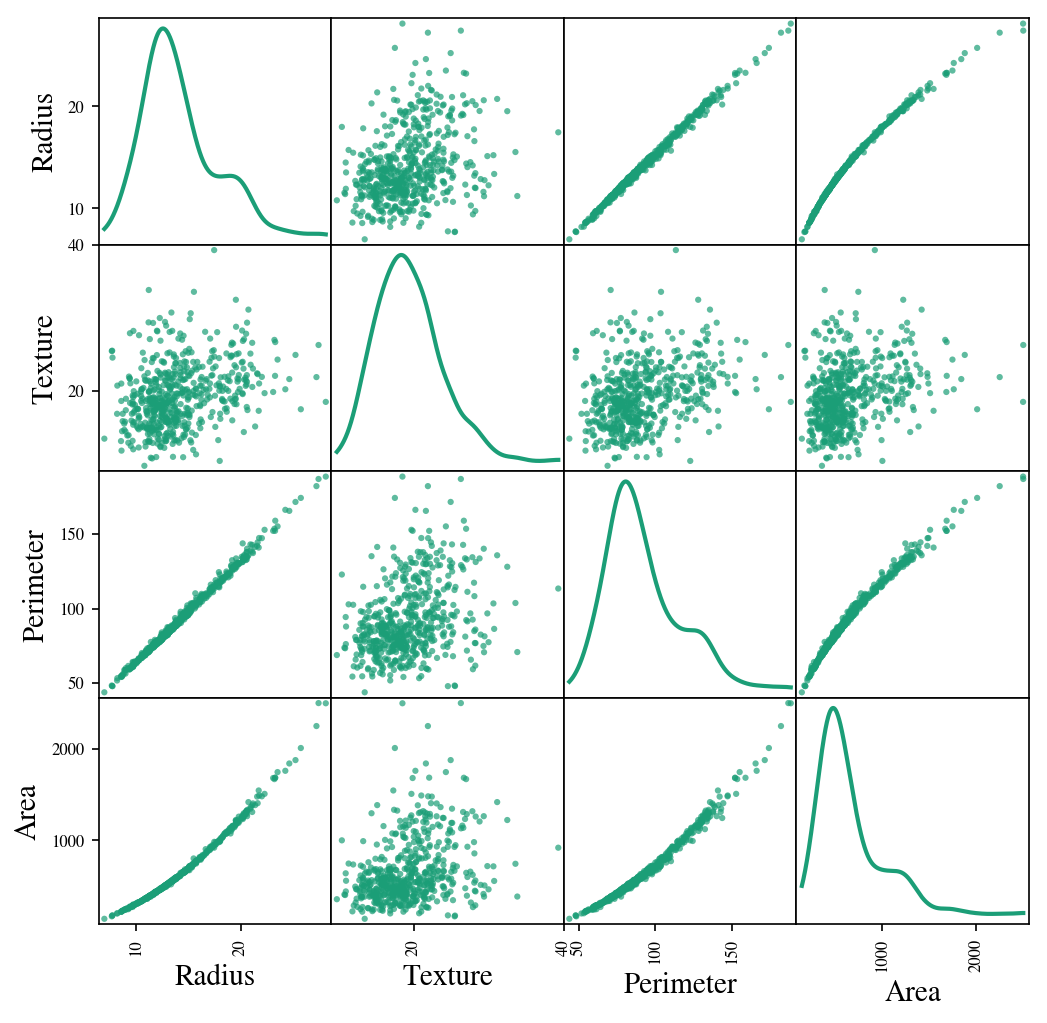

In [26]:
#Instruction5: Use a SPLOM to visualize some columns of this dataset. In Panda's the SPLOM is a one-liner.

pd.plotting.scatter_matrix(df.iloc[:,1:6],alpha = 0.7, figsize = (8,8),diagonal='kde')

In [31]:
#Instruction6: Are there any strong correlation between any of the features.  Run a correlation analysis on the three 
#features.

df.iloc[:,2:5].corr()


,Radius,Texture,Perimeter
Radius,1.000000,0.323782,0.997855
Texture,0.323782,1.000000,0.329533
Perimeter,0.997855,0.329533,1.000000


In [30]:
print(df.iloc[:,2:5].corr())

             Radius   Texture  Perimeter
Radius     1.000000  0.323782   0.997855
Texture    0.323782  1.000000   0.329533
Perimeter  0.997855  0.329533   1.000000


In [102]:
#Instruction7: Carry out the regression, first standardizing our variables. This is strictly not necessary, but we are doing it as we wish to play around with PCA. 
#Since scikit-learn wants a n_sample rows times n_features matrix, we need to reshape the x variable. We store both an _vec variable, which is easier to plot with, 
#as well as the reshaped variable. 

from sklearn.linear_model import LinearRegression

X_R_T = df[['Radius','Texture']].values
X_R_Tn = (X_R_T - X_R_T.mean(axis=0))/X_R_T.std(axis = 0)

Radius_std_vec = X_R_Tn[:,0]
Radius_std = Radius_std_vec.reshape(-1,1)

Texture_std_vec = X_R_Tn[:,1]
Texture_std = Texture_std_vec.reshape(-1,1)

#print(Texture_std)


In [57]:
#Instruction8: Split the data into a training set and a testing set. By default, 25% of the data is reserved for 
#testing. 

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train,y_test = train_test_split(Radius_std, Texture_std_vec)



In [61]:
#Instrusction9: Use the training set for the fit, and find what our predictions ought to be on both the training and 
#test set.

clf1 = LinearRegression()

clf1.fit(x_train, y_train)

predicted_train = clf1.predict(x_train)
predicted_test = clf1.predict(x_test)

trains= x_train.reshape(1,-1).flatten()
tests= x_test.reshape(1,-1).flatten()

print (clf1.coef_, clf1.intercept_)


[0.32879687] 0.014928203890071073


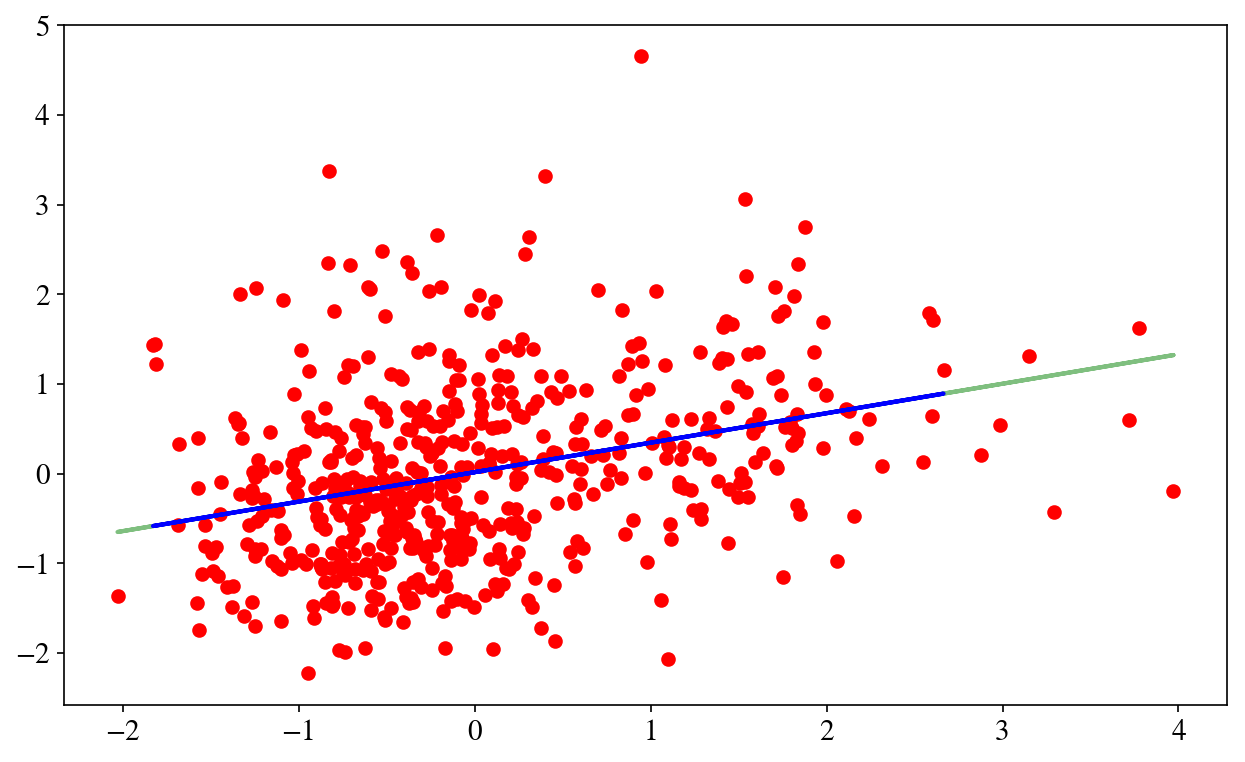

In [69]:
#Instruction10: Plot the scatter against the fit for both training and test data.

plt.scatter(Radius_std_vec, Texture_std_vec ,c='r')
plt.plot(trains, predicted_train, c='g', alpha=0.5)
plt.plot(tests, predicted_test, c='b', alpha=1)

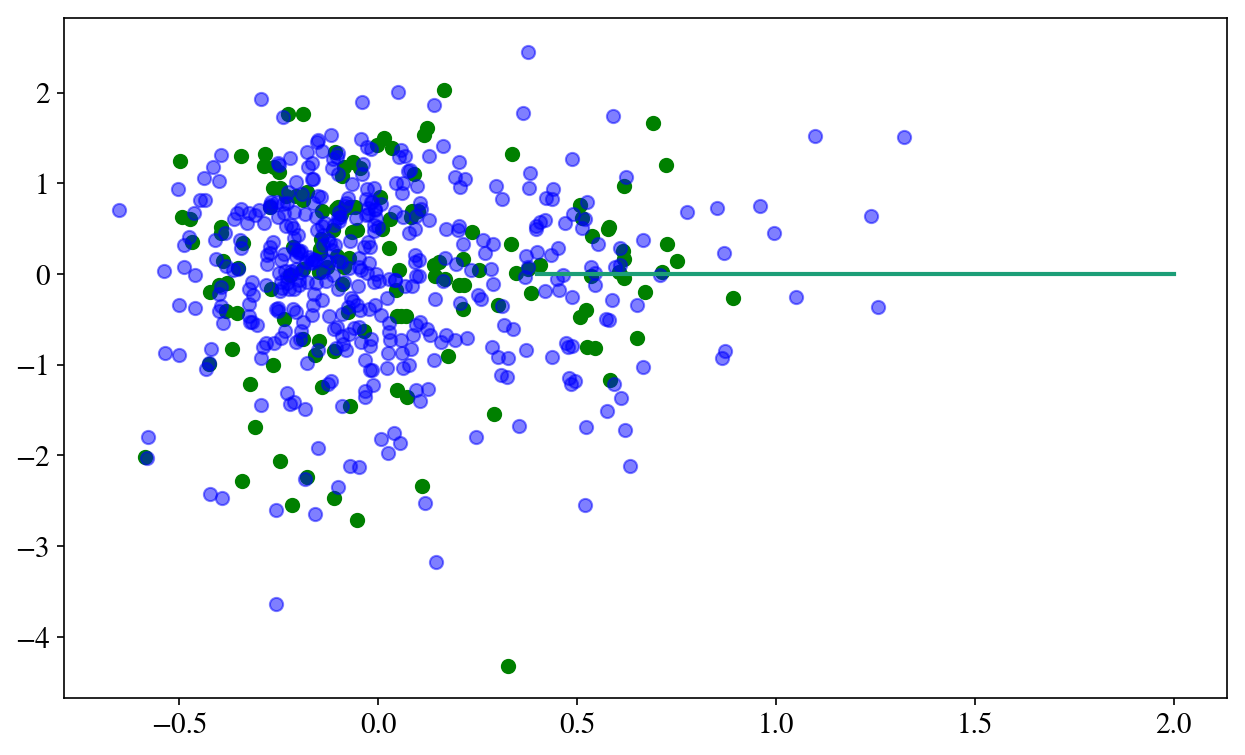

In [67]:
#Instruction11: Look at the residuals, again on both sets.
plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
plt.plot([0.4,2],[0,0])

In [71]:
#Instruction12: Take the standarddized data and do a 2-D PCA on it. 
#Here we do not seek to accomplish a dimensional reduction, but to understand the variance structure of the data.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X_R_Tn)
print (pca.explained_variance_ratio_)

[0.66189095 0.33810905]


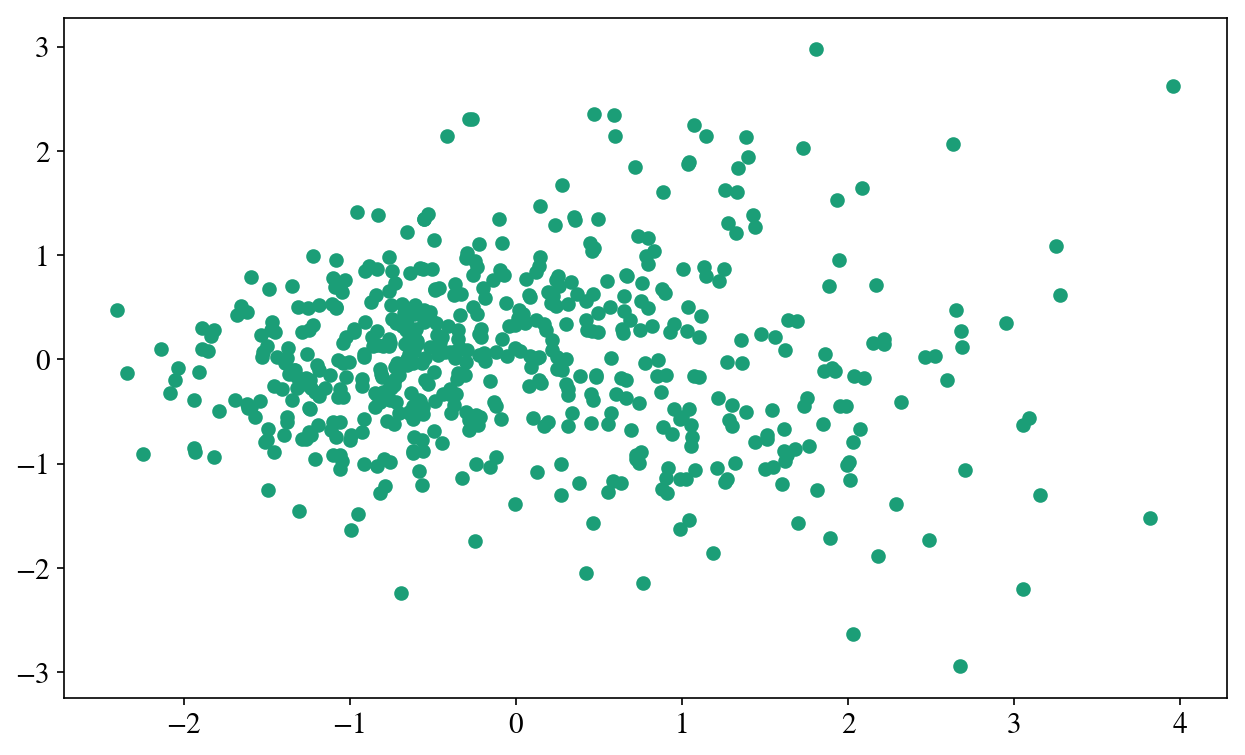

In [72]:
plt.scatter(X[:, 0], X[:, 1])

In [73]:
#Instruction13: Reconstruct the original data from only the first component, setting the others to 0.

pca1 = PCA(n_components=1) 
X_R = pca1.fit_transform(X_R_Tn)
X_reconstructed = pca1.inverse_transform(X_R)


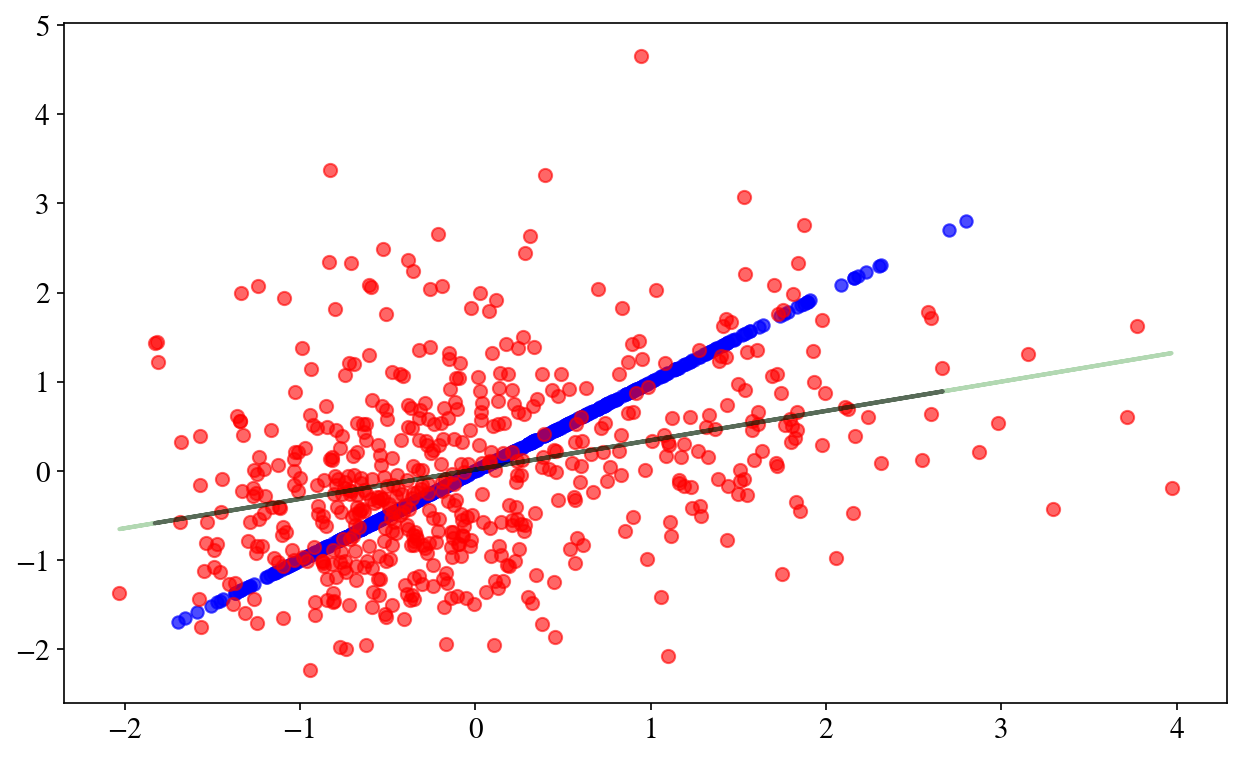

In [77]:
#Instruction14: Plot the reconstructed education(x) and income(y) from the first principal component, in blue.

plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1],c='b', s=35, alpha=0.7)

plt.scatter(Radius_std_vec, Texture_std_vec, s=40, c='r', alpha=0.6)

plt.plot(trains, predicted_train, c='g', alpha=0.3)
plt.plot(tests, predicted_test, c='black', alpha=0.5)

In [ ]:
#Part2: Logistic Regression Instuctions

In [78]:
#Instruction1: Load the array
data=np.array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])
data

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.]])

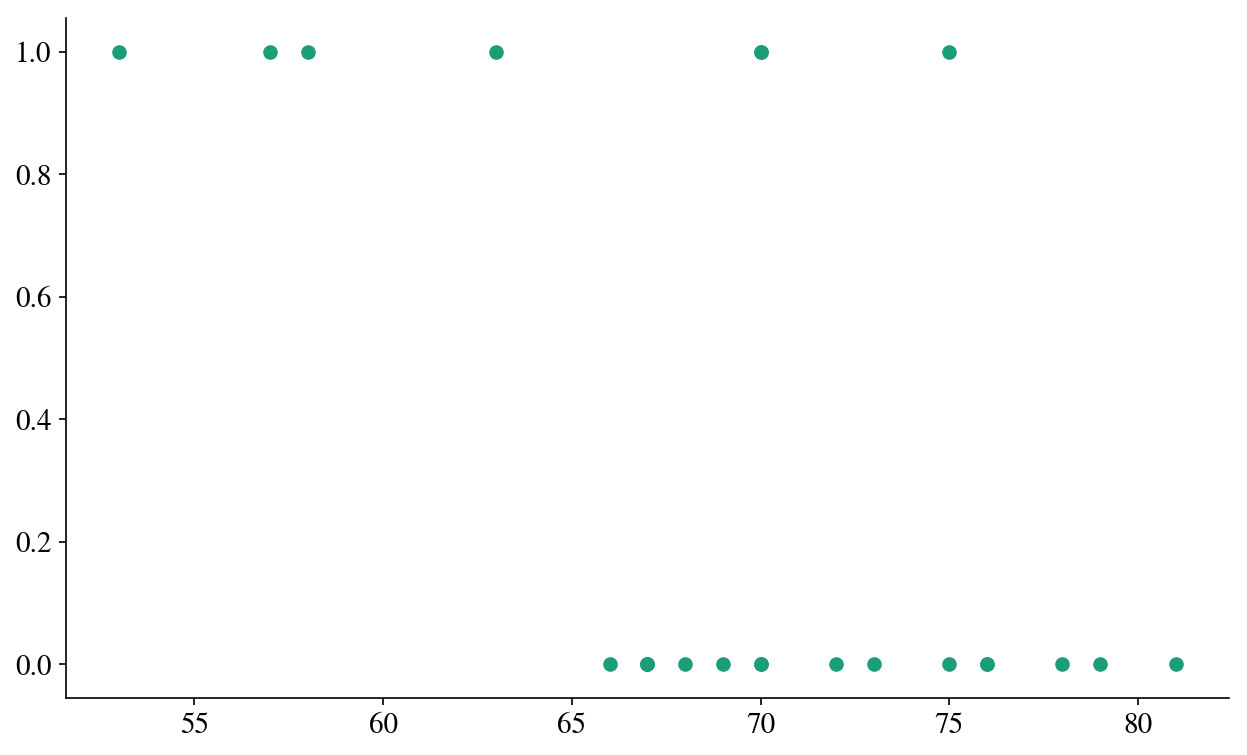

In [80]:
#Instruction2: Plot the array.

X,Y = data[:,0], data[:,1]

plt.scatter(X,Y)

axes = plt.gca()
axes.grid(False)
remove_border(axes)

In [83]:
#Instruction3: Run Logistic Regression with sklearn.linear_model and set c to 1000.

from sklearn.linear_model import LogisticRegression

reg=1000.
clf4 = LogisticRegression(C=reg)
clf4.fit(X.reshape(-1,1), Y)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

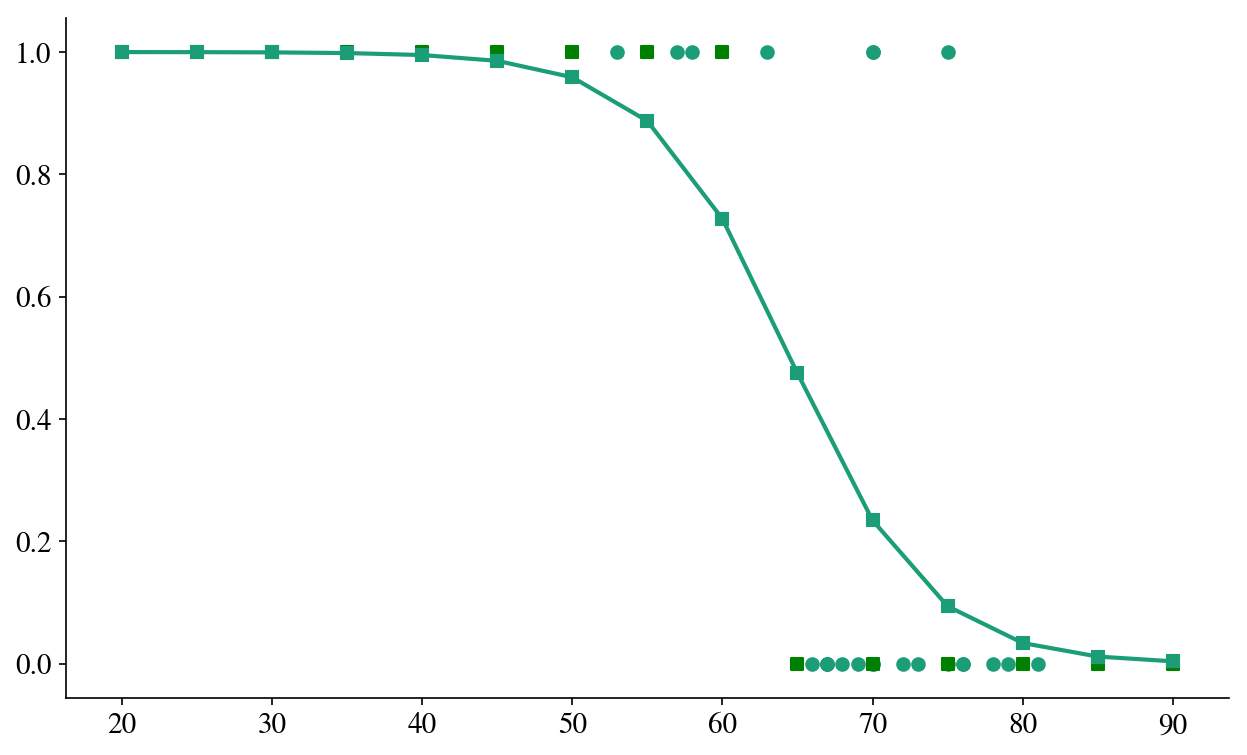

In [84]:
#Instruction4: Make predictions, get the associated probabilities, and plot them.

Xnew=np.linspace(20., 90., 15)
probs = clf4.predict_proba(Xnew.reshape(-1,1))[:, 1]
predicts = clf4.predict(Xnew.reshape(-1,1))

plt.scatter(X, Y)
axes=plt.gca()
axes.grid(False)
remove_border(axes)

plt.plot(Xnew, probs, marker='s')
plt.scatter(Xnew, predicts, marker='s', color="green")



In [85]:
#Instruction5: use pandas crosstab to write a table of prediction vs failure on the "training" set.

pd.crosstab(Y, clf4.predict(X.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])


Predicted,0.0,1.0
Actual,,
0.0,16,0
1.0,3,4


In [ ]:
#Part3: Bias and Variance and Cross Validation


##### Instruction1: Load the settings needed for part3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

In [167]:
import random
import copy
import brewer2mpl

dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)

def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [88]:
#Instruction2: Load your dataset

import pandas as pd
df=pd.read_csv("wdbc.csv")
print(len(df.columns))
print(len(df.index))

12
569


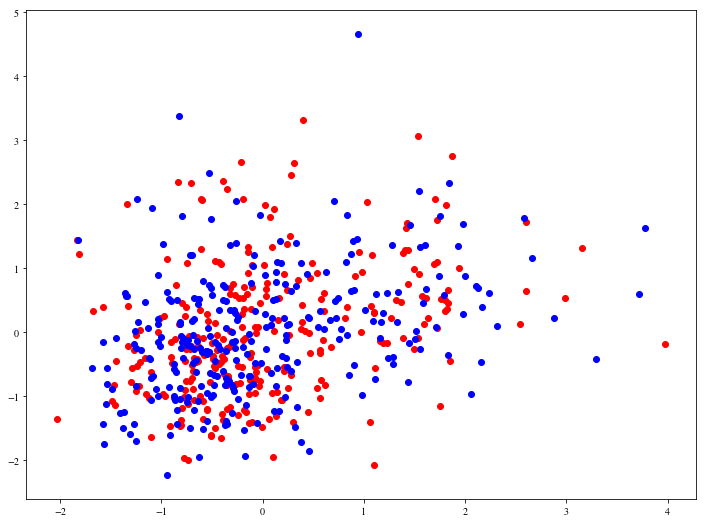

In [97]:
#Instruction3: Split the data set into equal parts test and training using the std vectors from Part1
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec)

from sklearn.cross_validation import train_test_split

fig = plt.figure(figsize = (12,9))

xtrain, xtest, ytrain, ytest = train_test_split(Radius_std_vec, Texture_std_vec, train_size=0.5)

plt.scatter(xtrain, ytrain, color='red')
plt.scatter(xtest, ytest, color='blue')




In [126]:
#Instruction4: Create a column called "class" and randomly add a "1", "2", or "3" for every row.
#e.g.
#featueA | Class
#--- | ---
#9 | 1
#5 | 2
#7 | 3
#6 | 2
#3 | 1
#6 | 3

df['randNumCol'] = np.random.randint(1, 4, df.shape[0])
print(df.columns)

Index(['ID_Number', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Comcave_Points', 'Symetry', 'Fractal_dimensions', 'randNumCol'], dtype='object')


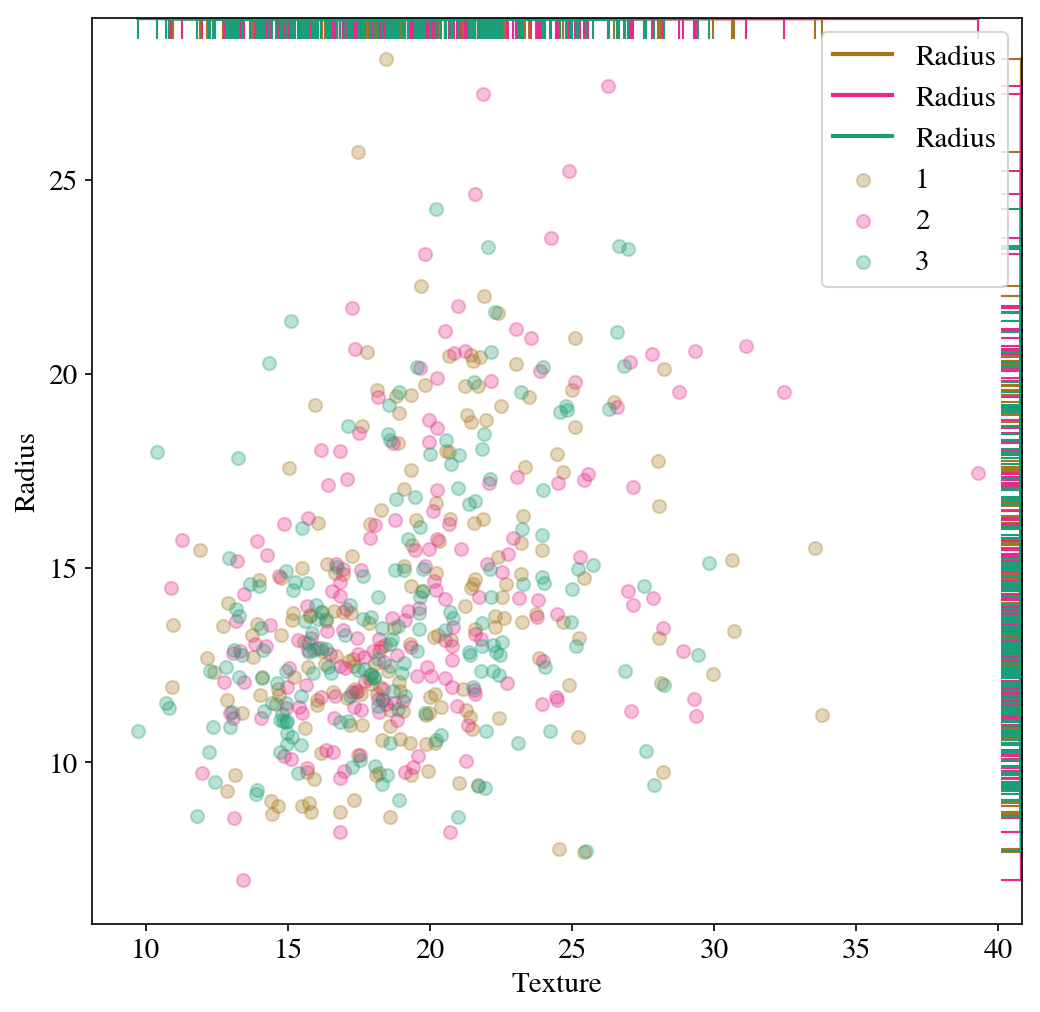

In [55]:
#Instruction5: Choose three different features in your dataset and cluster them by the randomNumCol




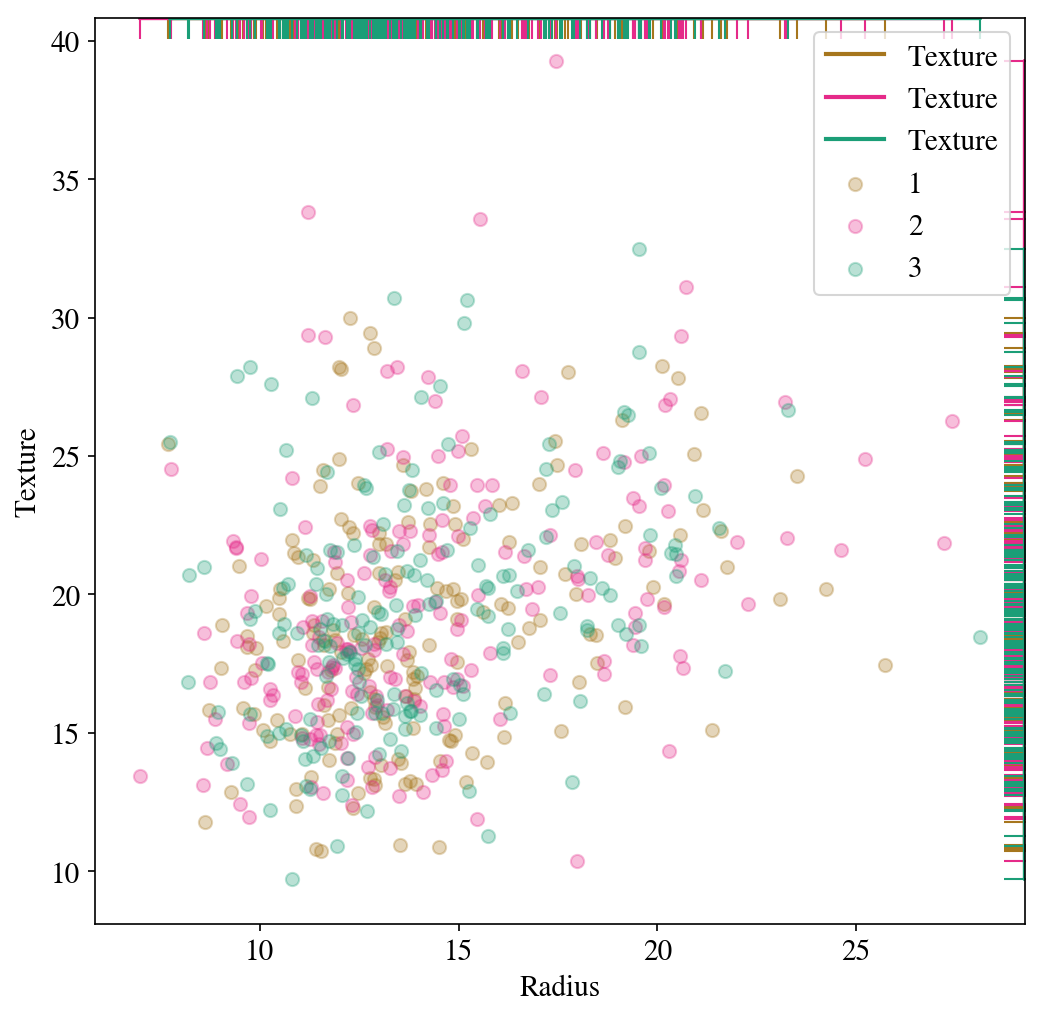

In [169]:
akeys=[1,2,3]
avals=[1,2,3]

amap={e[0]:e[1] for e in zip(akeys,avals)}

ax=scatter_by(df, 'Radius', 'Texture', by='randNumCol', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');

In [129]:
akeys=[1,2,3]
avals=[1,2,3]
amap={e[0]:e[1] for e in zip(akeys,avals)}
amap

{1: 1, 2: 2, 3: 3}

In [137]:
#Instructin6: Add plotting settings
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE"), clf.score(Xte, yte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax

In [140]:
#Instruction7: Develop a kNN with 20 neighbors
from sklearn.neighbors import KNeighborsClassifier

subdf = df[['Radius','Texture']]
subdfstd = (subdf - subdf.mean())/subdf.std()

X = subdfstd.values
y = df['randNumCol'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.6)
Xtr = np.concatenate((Xtrain, Xtest))

SCORE


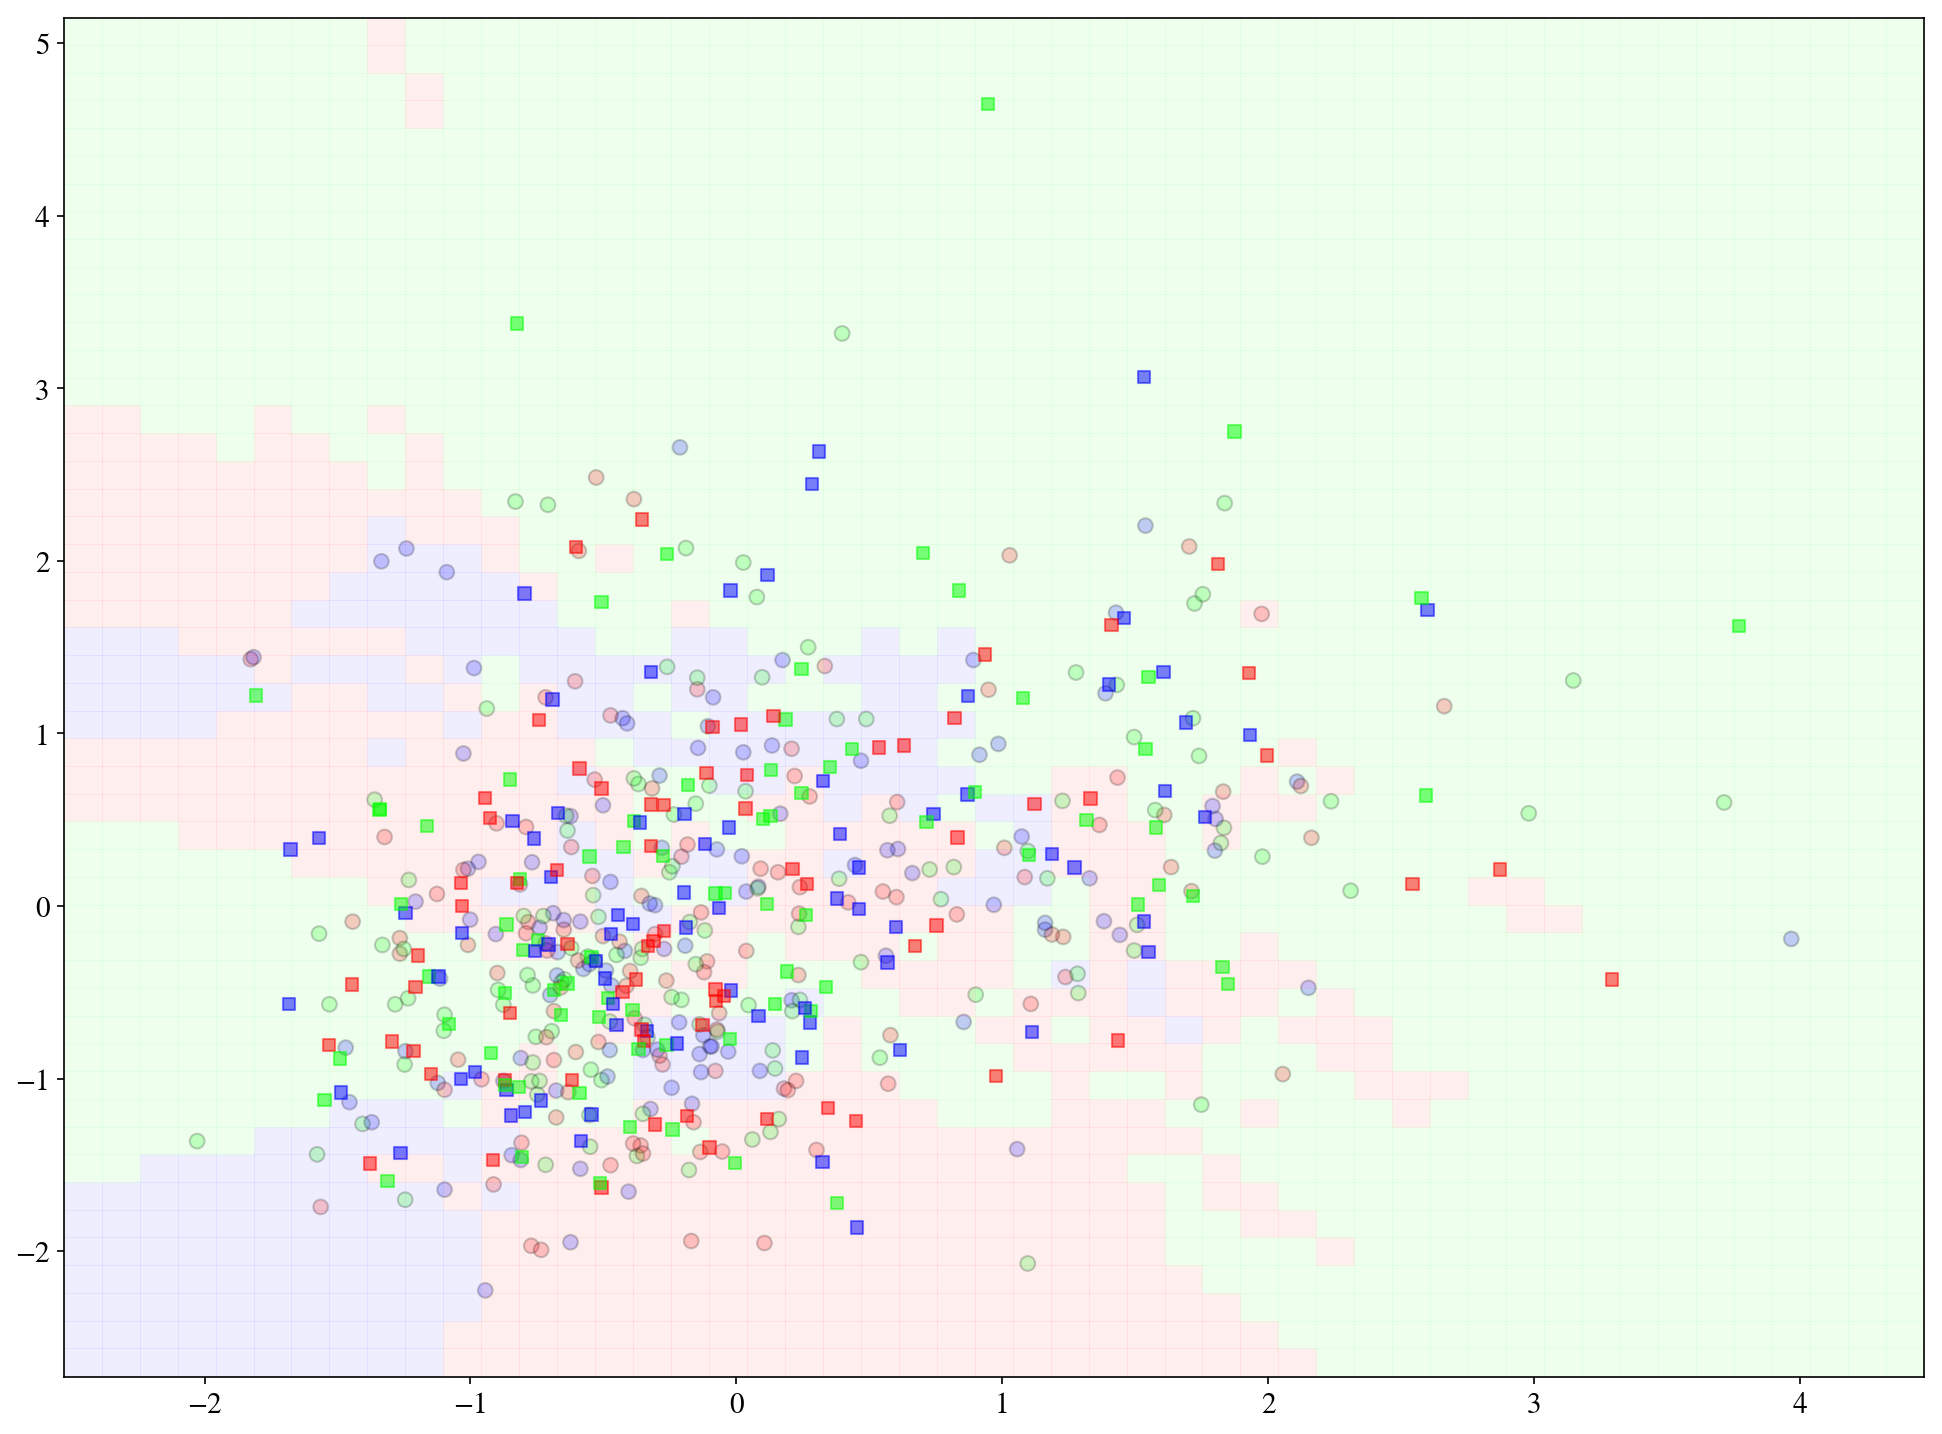

In [151]:
#Instruction8: Plot the kNN model with 20 neighbors


clf = KNeighborsClassifier(20).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)


SCORE


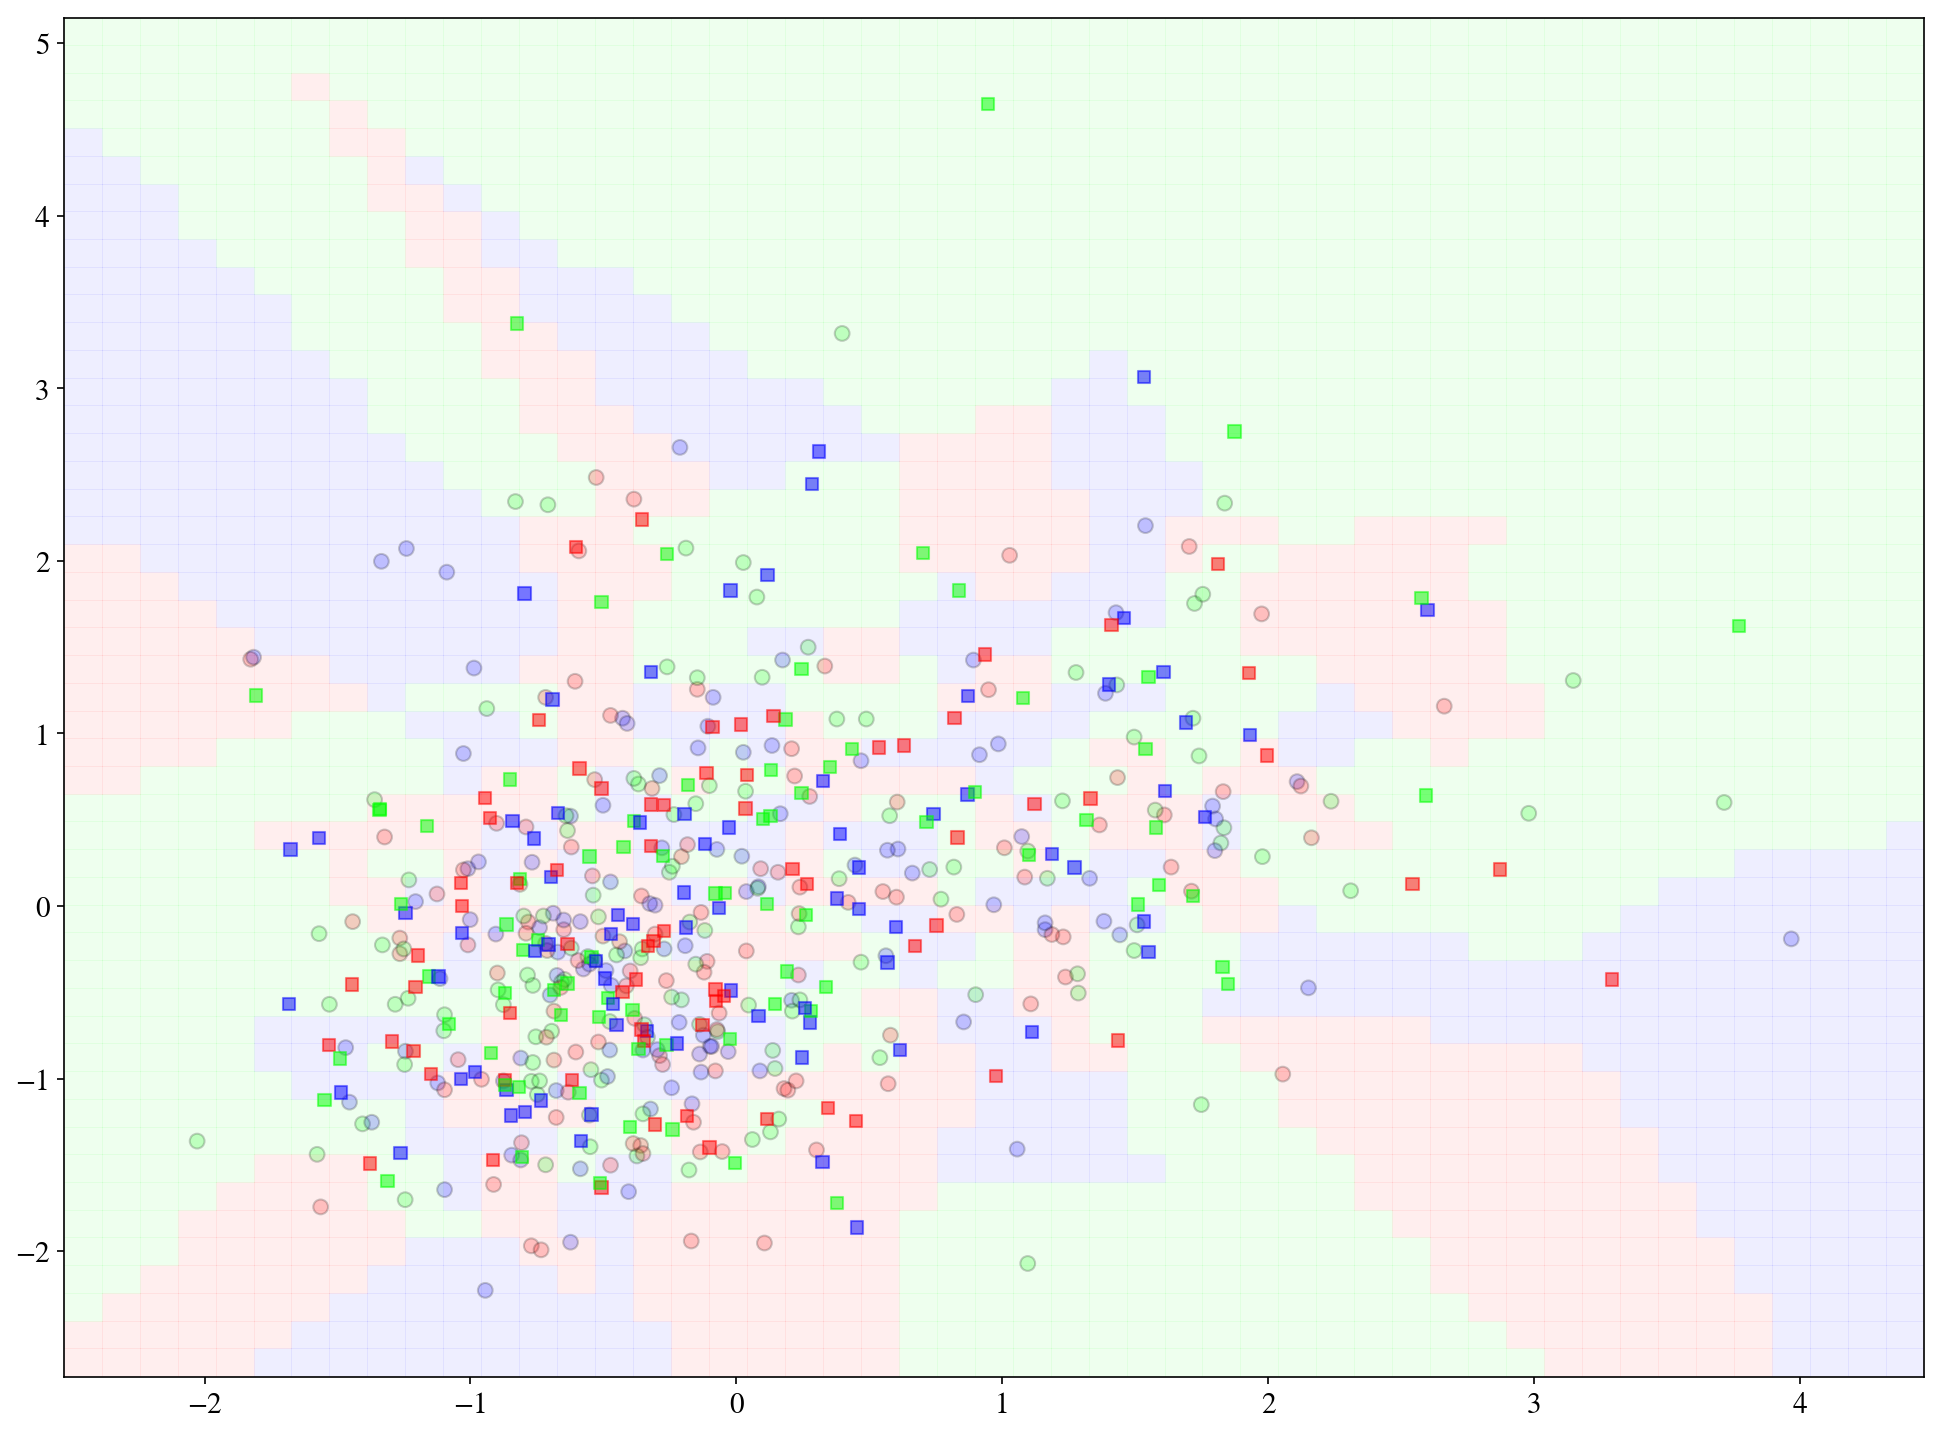

In [152]:
##Instruction9: Plot the kNN model with 1 neighbors


clf = KNeighborsClassifier(1).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)


SCORE


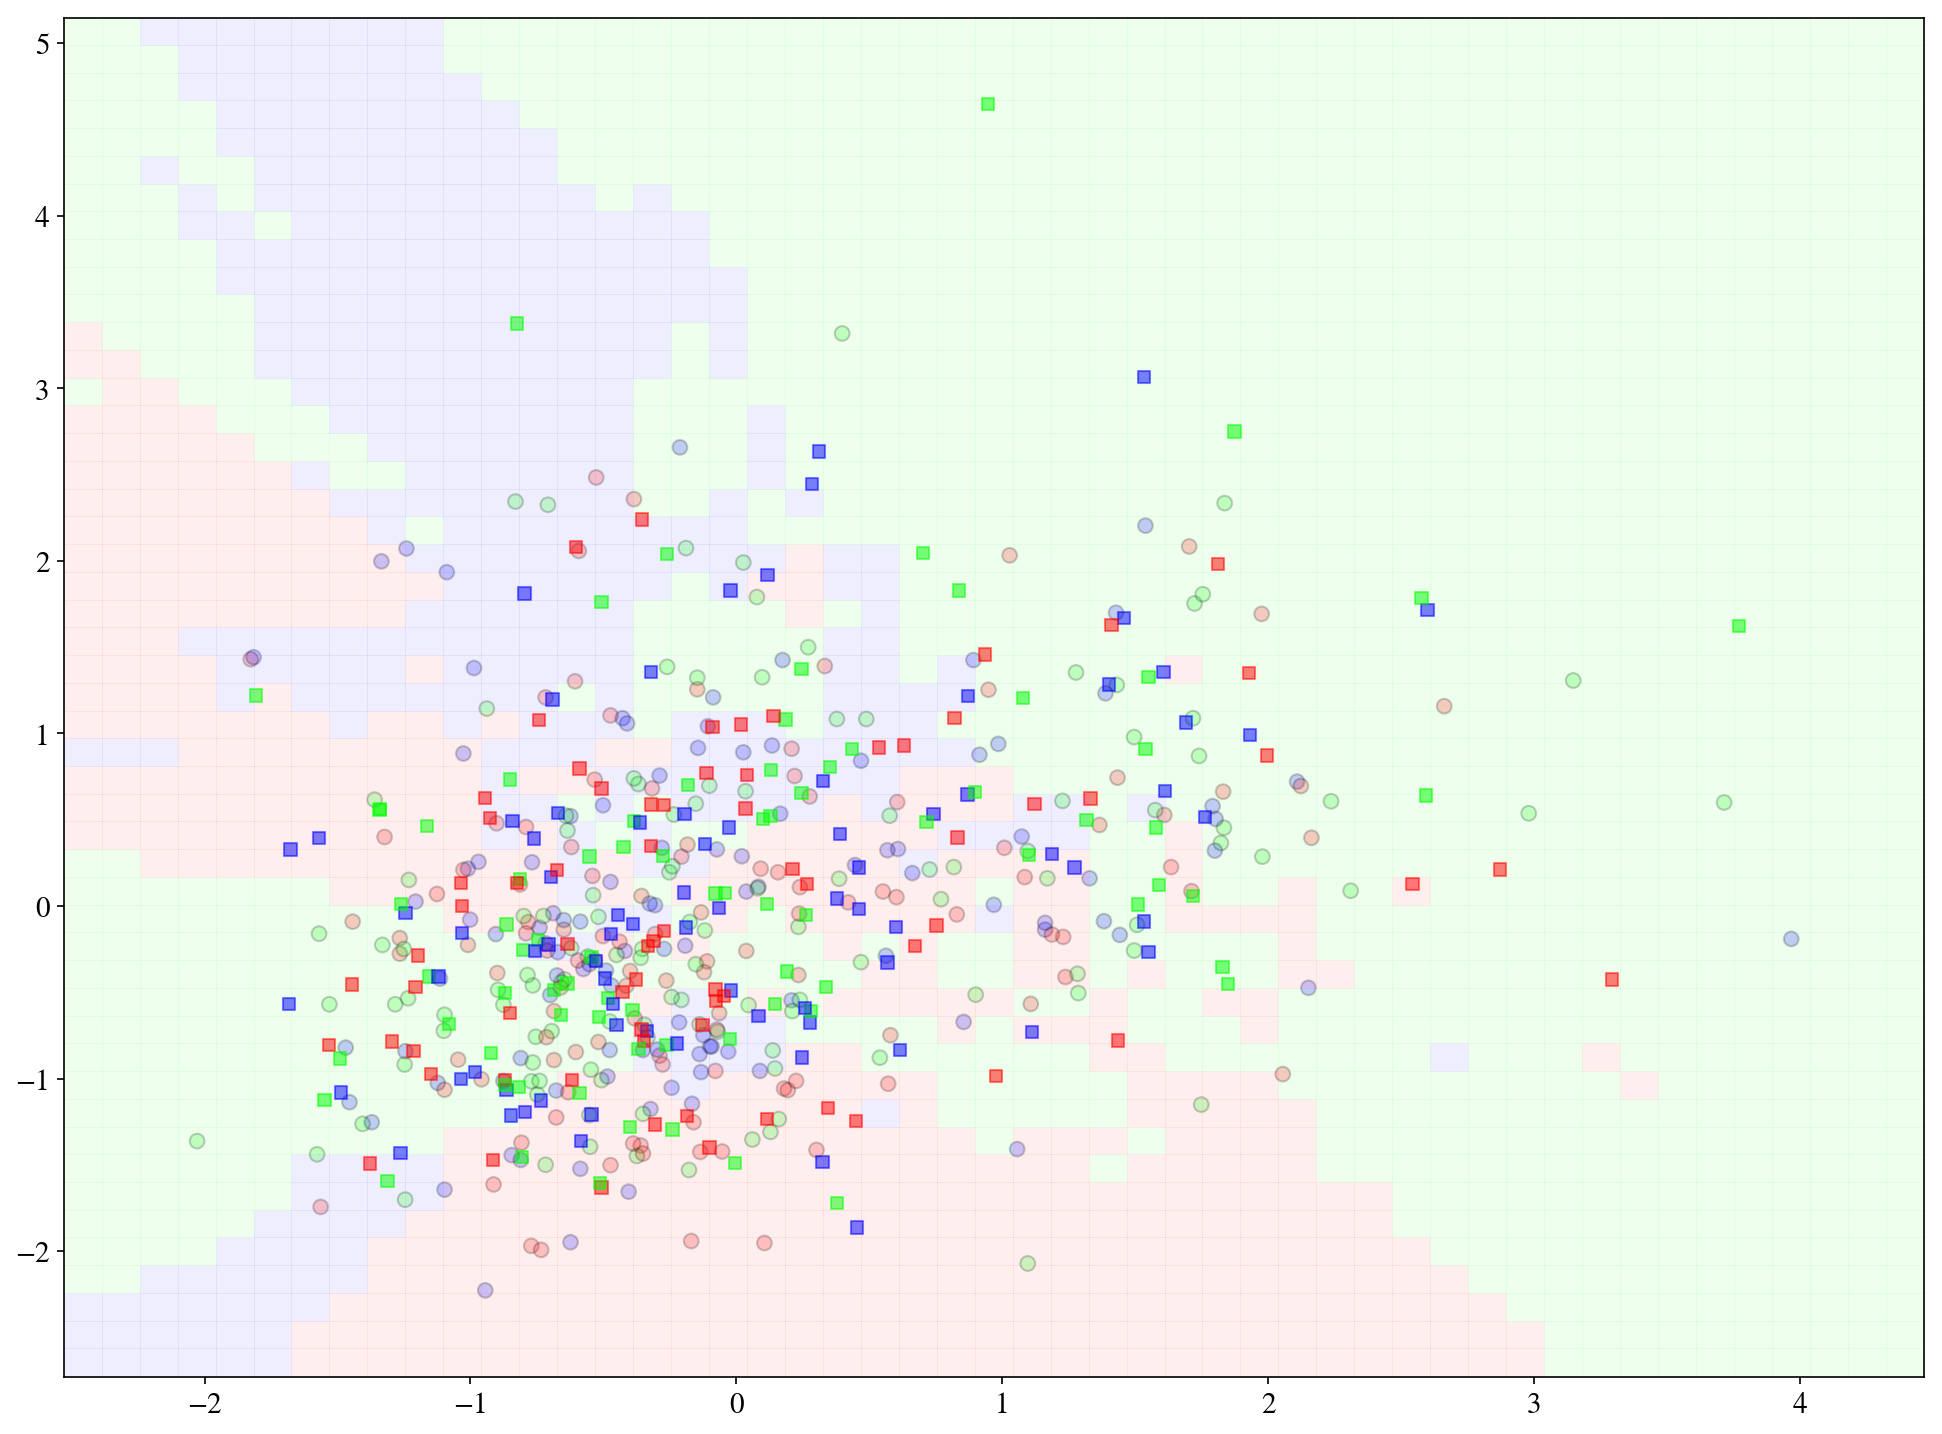

In [153]:
##Instruction10: Plot the kNN model with 35 neighbors

clf = KNeighborsClassifier(35).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

In [158]:
#Instruction 11:


# test the algrithom

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
Xtr=np.concatenate((Xtrain, Xtest))

parameters = {"n_neighbors": np.arange(1,80,1)}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, param_grid=parameters, cv=10)
gs.fit(Xtrain, ytrain)

print(gs.best_params_, gs.best_score_)
y_true, y_pred = ytest, gs.predict(Xtest)
print(classification_report(y_true, y_pred))

{'n_neighbors': 1} 0.34725274725274724
             precision    recall  f1-score   support

          1       0.31      0.38      0.34        34
          2       0.44      0.29      0.35        48
          3       0.25      0.31      0.28        32

avg / total       0.35      0.32      0.33       114



SCORE


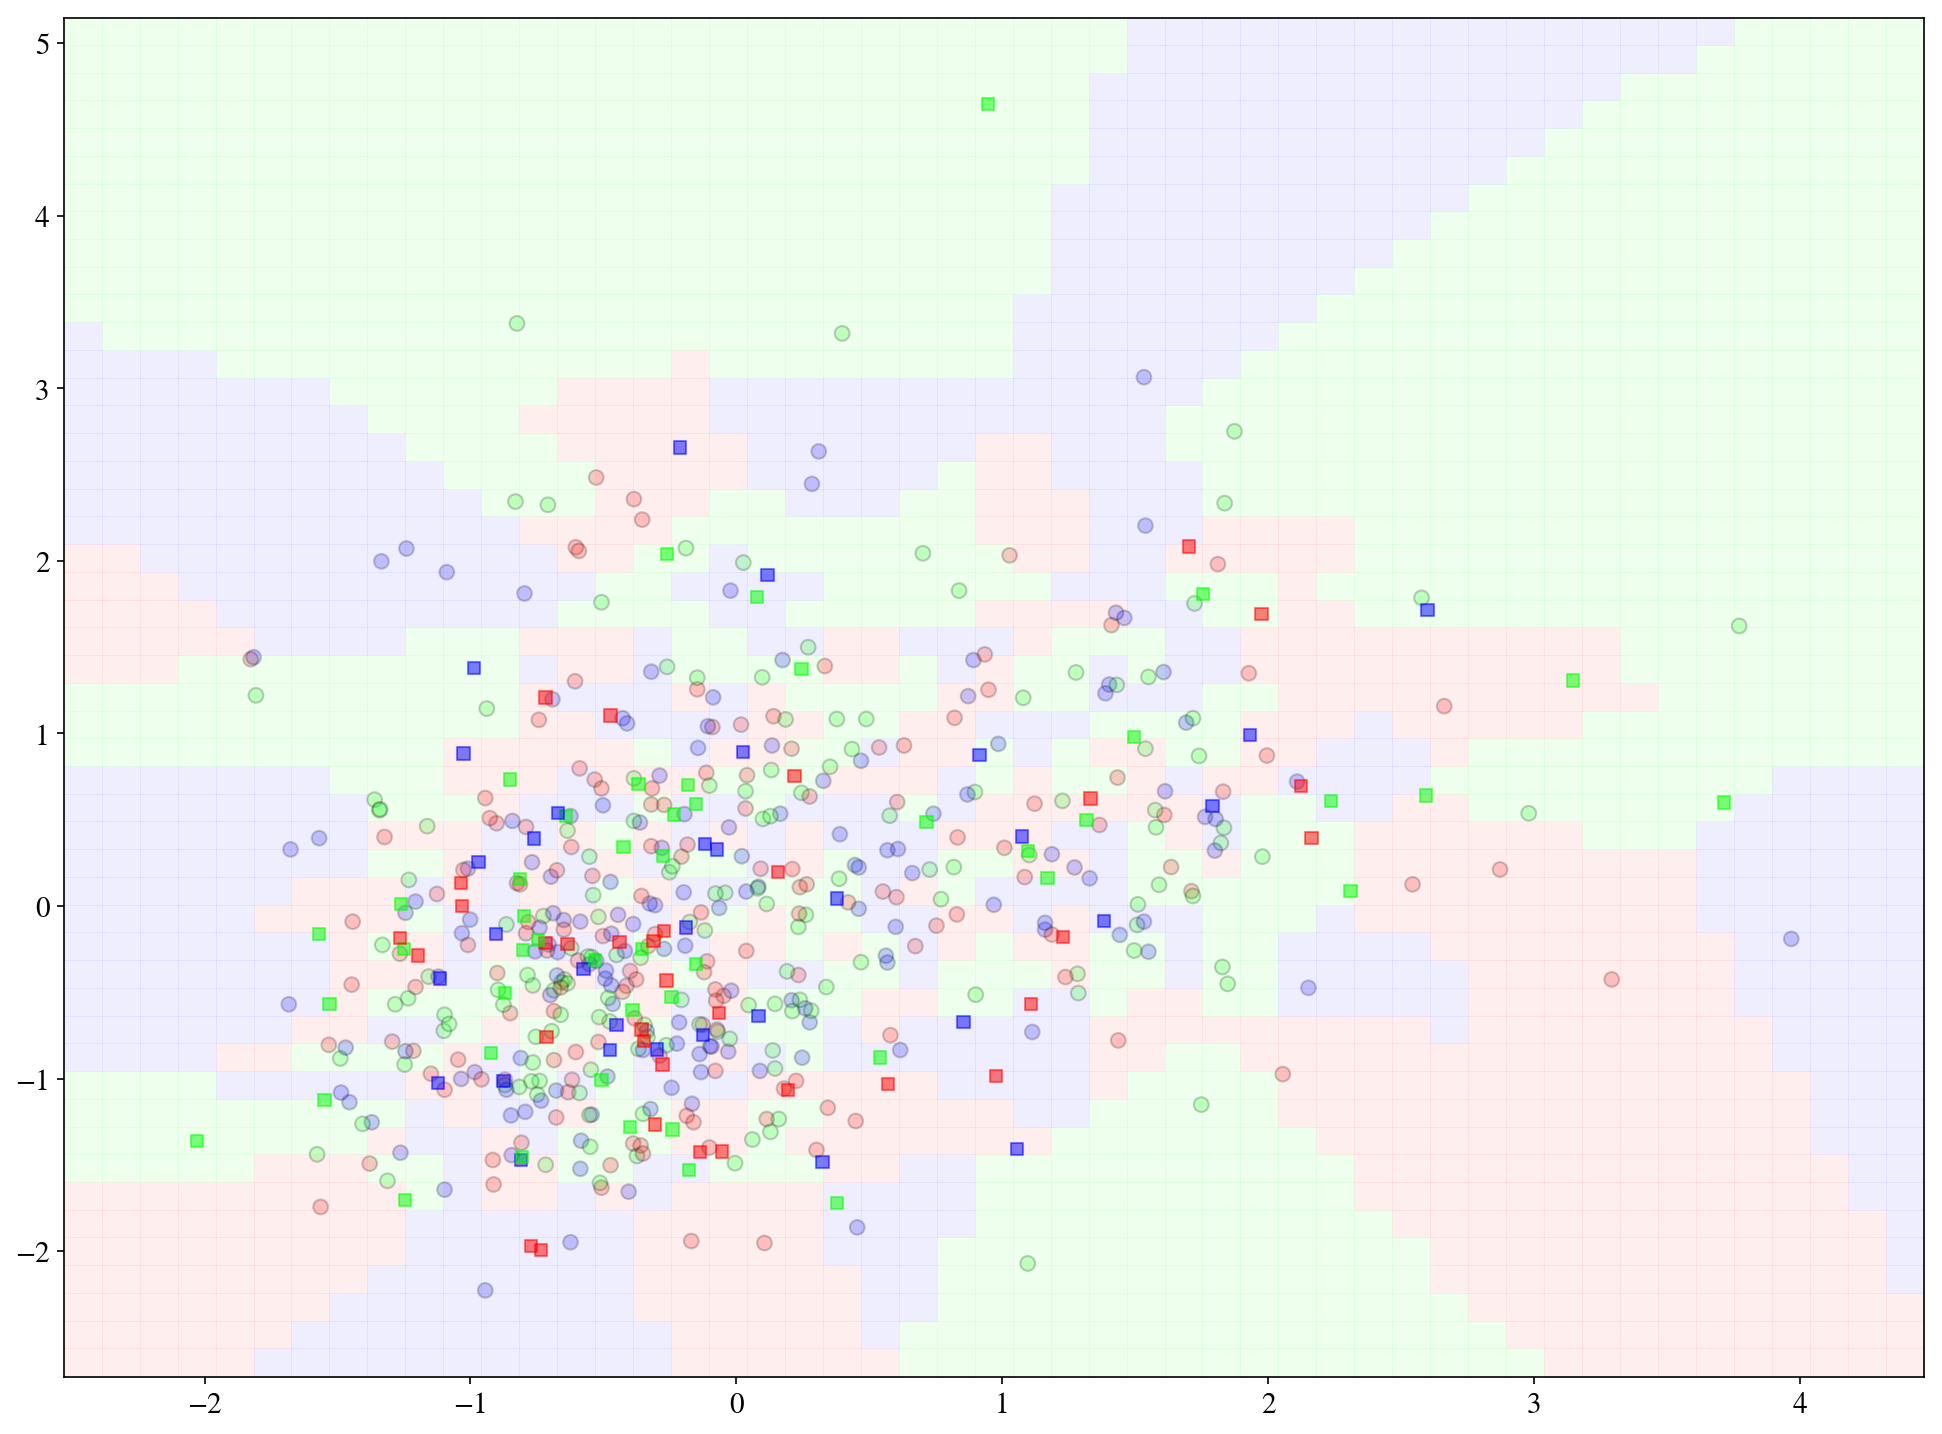

In [159]:
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, gs)

In [163]:
a = np.arange(1,80,1)
a

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79])

In [164]:
# a) Develop a function to run KNN with a k from 1-80.  Split the data set into test and training and then
# plot the accuracies of the training set vs. the test set for all 80 test runs.
# b) Use "from sklearn.grid_search import GridSearchCV"  and "from sklearn.metrics import classification_report
#  to print the precision, recall, f1-score, and support
# c) Creat a plot using the GridSearchCV values. 

# Package algrithm to a function


from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

def KNN_1to80(df,X_train, y_train,area):
    subdf = df[[X_train,y_train]]
    subdfstd = (subdf - subdf.mean())/subdf.std()

    X = subdfstd.values
    y = df[area].values

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
    Xtr=np.concatenate((Xtrain, Xtest))

    parameters = {"n_neighbors": np.arange(1,80,1)}
    clf = KNeighborsClassifier()
    gs = GridSearchCV(clf, param_grid=parameters, cv=10)
    gs.fit(Xtrain, ytrain)
    
    print(gs.best_params_, gs.best_score_)
    y_true, y_pred = ytest, gs.predict(Xtest)
    print(classification_report(y_true, y_pred))
    points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, gs)

{'n_neighbors': 2} 0.34065934065934067
             precision    recall  f1-score   support

          1       0.28      0.51      0.36        35
          2       0.29      0.28      0.29        39
          3       0.25      0.07      0.12        40

avg / total       0.27      0.28      0.25       114

SCORE


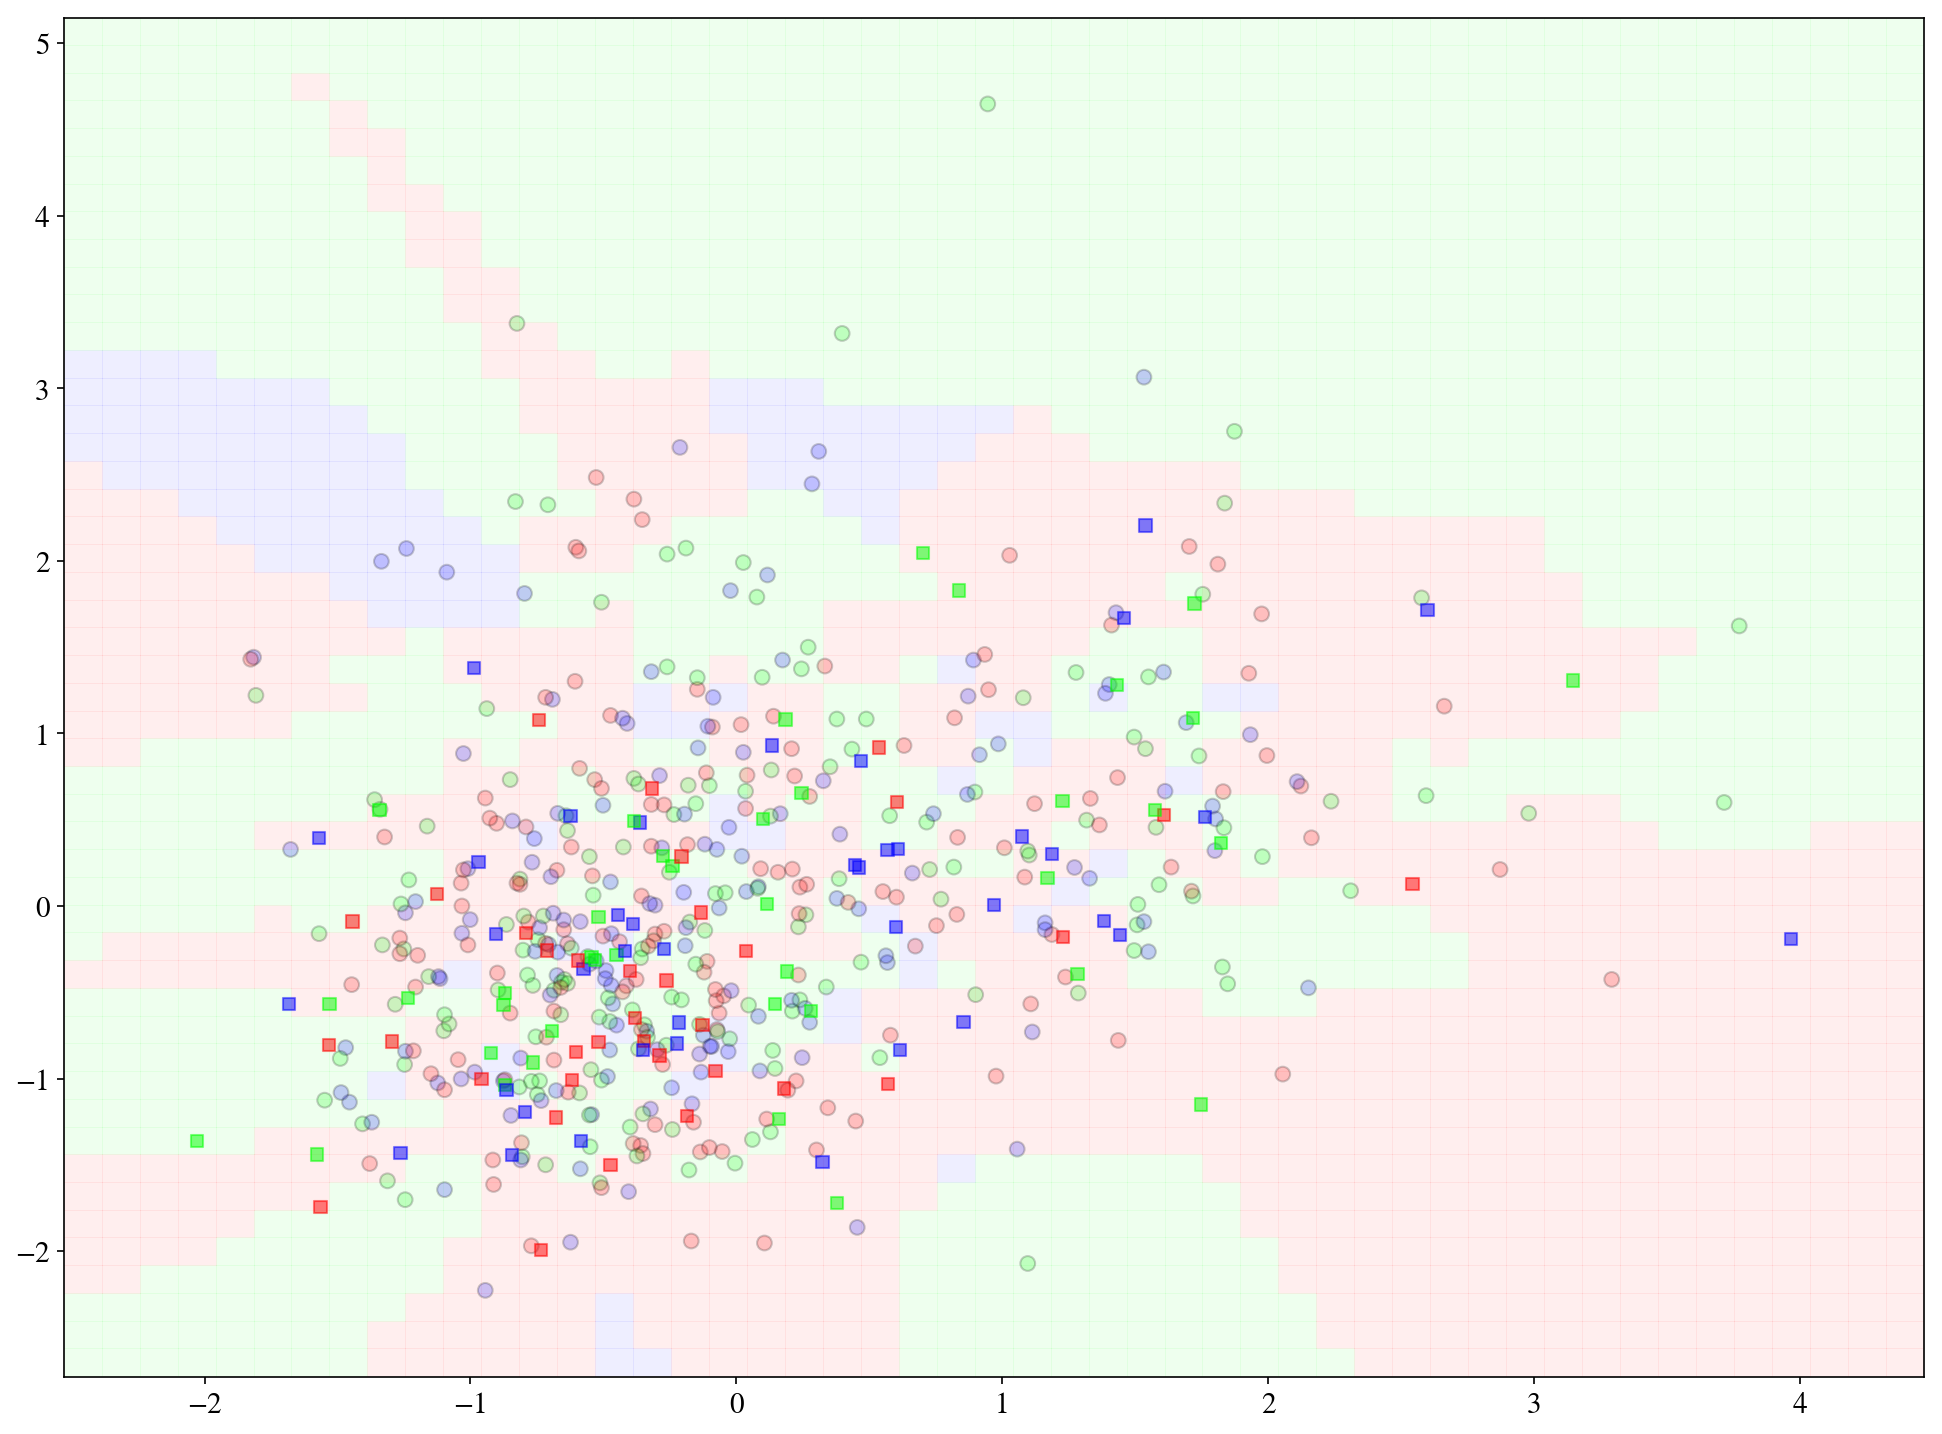

In [165]:
# apply the function

KNN_1to80(df,'Radius','Texture','randNumCol')
    